In [13]:
import scipy.stats as st 
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [14]:
from patsy import dmatrices
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
#from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import cross_val_score

In [15]:
import pymc3 as pm
from pymc3 import Normal, Binomial, sample, Model # Import relevant distributions
from pymc3.math import invlogit
# Use a theano shared variable to be able to exchange the data the model runs on
from theano import shared

In [16]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
from xgboost import plot_importance
from sklearn.model_selection import StratifiedKFold
#from sklearn.model_selection import GridSearchCV
#%matplotlib inline

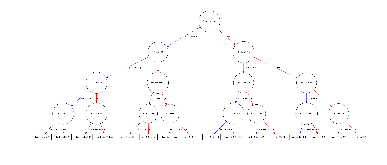

In [53]:
from xgboost import plot_tree

# plot single tree
plot_tree(model)
pyplot.show()

In [144]:
from xgboost import plot_importance
#from xgboost import 

In [121]:
?u.feature_importances_

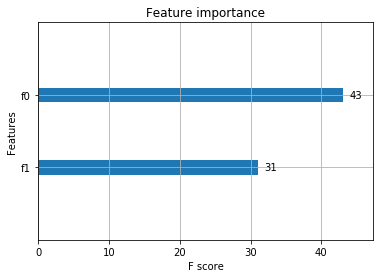

In [205]:
plot_importance(u,importance_type="weight")

In [220]:
u.booster().get_score(importance_type='cover')
#     self, fmap='', importance_type='weight'):
#         """Get feature importance of each feature.
#         Importance type can be defined as:
#             'weight' - the number of times a feature is used to split the data across all trees.
#             'gain' - the average gain of the feature when it is used in trees
#             'cover' - the average coverage of the feature when it is used in trees

{'f0': 336.2849116279069, 'f1': 575.6274193548386}

In [219]:
gmap

{'f0': 336.2849116279069, 'f1': 575.6274193548386}

In [204]:
fmap

{'f0': 43, 'f1': 31}

In [213]:
results = u.booster().get_dump( with_stats=True)

In [257]:
len(FF)/4

1675.0

In [303]:
FF = pd.DataFrame(X_train)
FF['y'] =y_train
len(FF['y'])*(.5)*(1 - .5)# = 1628.25
len(FF[(FF[0]<0.304833) & (FF[1]<-0.225163)])
FF[[0,1]].head()

,0,1
0,0.545257,-0.653484
1,-0.332258,1.866386
2,1.227723,-0.269642
3,-0.006776,-0.993703
4,-1.202238,0.914339


In [307]:
p = u.predict_proba( X_train, ntree_limit=4)

sum(p*(1-p))  # sum of the hessians in that node,(root node has all data)

array([ 1567.2565918,  1567.2565918], dtype=float32)

In [309]:
for tree in [results[4]]:
    for line in tree.split('\n'):
        print(line)

0:[f1<-0.283024] yes=1,no=2,missing=1,gain=887.849,cover=1567.27
	1:[f0<0.603904] yes=3,no=4,missing=3,gain=223.928,cover=616.304
		3:[f1<-0.807482] yes=7,no=8,missing=7,gain=43.0451,cover=449.776
			7:[f1<-1.11891] yes=15,no=16,missing=15,gain=3.27843,cover=230.274
				15:leaf=-0.144725,cover=143.13
				16:leaf=-0.11431,cover=87.1437
			8:[f0<-0.210721] yes=17,no=18,missing=17,gain=49.9514,cover=219.502
				17:leaf=-0.112034,cover=126.157
				18:leaf=-0.0155141,cover=93.345
		4:[f1<-1.3566] yes=9,no=10,missing=9,gain=85.6088,cover=166.528
			9:[f0<1.61769] yes=19,no=20,missing=19,gain=13.5471,cover=35.1795
				19:leaf=-0.13451,cover=28.1904
				20:leaf=0.0181103,cover=6.98907
			10:[f0<1.47389] yes=21,no=22,missing=21,gain=21.3591,cover=131.349
				21:leaf=0.0425203,cover=93.1274
				22:leaf=0.131326,cover=38.2212
	2:[f0<-0.295449] yes=5,no=6,missing=5,gain=209.613,cover=950.967
		5:[f1<0.458872] yes=11,no=12,missing=11,gain=168.216,cover=376.103
			11:[f0<-0.945645] yes=23,no=24,miss

In [218]:
importance_type = 'cover'
importance_type += '='
fmap = {}
gmap = {}
for tree in results:
    for line in tree.split('\n'):
        # look for the opening square bracket
        arr = line.split('[')
        #print('arr: ',arr, len(arr))
        # if no opening bracket (leaf node), ignore this line
        if len(arr) == 1:
            #print('arr: ',arr, len(arr))
            continue

        # look for the closing bracket, extract only info within that bracket
        fid = arr[1].split(']')
        print('fid] : ',fid)
        # extract gain or cover from string after closing bracket
        g = float(fid[1].split(importance_type)[1].split(',')[0])
        print('g: ',g)
        # extract feature name from string before closing bracket
        fid = fid[0].split('<')[0]
        print('fid< : ',fid)

        if fid not in fmap:
            # if the feature hasn't been seen yet
            fmap[fid] = 1
            gmap[fid] = g
        else:
            fmap[fid] += 1
            gmap[fid] += g

# calculate average value (gain/cover) for each feature
for fid in gmap:
    gmap[fid] = gmap[fid] / fmap[fid]

print(fmap,gmap)

fid] :  ['f1<-0.225163', ' yes=1,no=2,missing=1,gain=1853.31,cover=1675']
g:  1675.0
fid< :  f1
fid] :  ['f0<0.304833', ' yes=3,no=4,missing=3,gain=486.058,cover=694']
g:  694.0
fid< :  f0
fid] :  ['f1<-0.645459', ' yes=7,no=8,missing=7,gain=57.4649,cover=442.25']
g:  442.25
fid< :  f1
fid] :  ['f0<-0.247377', ' yes=15,no=16,missing=15,gain=4.78964,cover=271.75']
g:  271.75
fid< :  f0
fid] :  ['f0<-0.716677', ' yes=17,no=18,missing=17,gain=54.6679,cover=170.5']
g:  170.5
fid< :  f0
fid] :  ['f1<-0.992163', ' yes=9,no=10,missing=9,gain=214.011,cover=251.75']
g:  251.75
fid< :  f1
fid] :  ['f0<1.61244', ' yes=19,no=20,missing=19,gain=52.0029,cover=92.25']
g:  92.25
fid< :  f0
fid] :  ['f0<0.68308', ' yes=21,no=22,missing=21,gain=47.5339,cover=159.5']
g:  159.5
fid< :  f0
fid] :  ['f0<-0.527779', ' yes=5,no=6,missing=5,gain=358.949,cover=981']
g:  981.0
fid< :  f0
fid] :  ['f1<0.561749', ' yes=11,no=12,missing=11,gain=250.085,cover=287.75']
g:  287.75
fid< :  f1
fid] :  ['f0<-0.964844', '

In [ ]:

            trees = self.get_dump(fmap, with_stats=True)

            importance_type += '='
            fmap = {}
            gmap = {}
            for tree in trees:
                for line in tree.split('\n'):
                    # look for the opening square bracket
                    arr = line.split('[')
                    # if no opening bracket (leaf node), ignore this line
                    if len(arr) == 1:
                        continue

                    # look for the closing bracket, extract only info within that bracket
                    fid = arr[1].split(']')

                    # extract gain or cover from string after closing bracket
                    g = float(fid[1].split(importance_type)[1].split(',')[0])

                    # extract feature name from string before closing bracket
                    fid = fid[0].split('<')[0]

                    if fid not in fmap:
                        # if the feature hasn't been seen yet
                        fmap[fid] = 1
                        gmap[fid] = g
                    else:
                        fmap[fid] += 1
                        gmap[fid] += g

            # calculate average value (gain/cover) for each feature
            for fid in gmap:
                gmap[fid] = gmap[fid] / fmap[fid]

return gmap

In [170]:
################ WEIGHT
#results
fmap={}
for tree in [results[0]]:
    for line in tree.split('\n'):
        # look for the opening square bracket
        arr = line.split('[')
        print('arr :',arr,"len(arr) == 1 : ",len(arr) == 1,len(arr))
                    # if no opening bracket (leaf node), ignore this line
        if len(arr) == 1:
            print(len(arr) == 1,'arr :',arr)
            continue
        # extract feature name from string between []
        fid = arr[1].split(']')[0].split('<')[0]
        print('fid :',fid)
        if fid not in fmap:
        # if the feature hasn't been seen yet
            fmap[fid] = 1
        else:
            fmap[fid] += 1
print(fmap)

arr : ['0:', 'f1<-0.225163] yes=1,no=2,missing=1'] len(arr) == 1 :  False 2
fid : f1
arr : ['\t1:', 'f0<0.304833] yes=3,no=4,missing=3'] len(arr) == 1 :  False 2
fid : f0
arr : ['\t\t3:', 'f1<-0.645459] yes=7,no=8,missing=7'] len(arr) == 1 :  False 2
fid : f1
arr : ['\t\t\t7:', 'f0<-0.247377] yes=15,no=16,missing=15'] len(arr) == 1 :  False 2
fid : f0
arr : ['\t\t\t\t15:leaf=-0.191379'] len(arr) == 1 :  True 1
True arr : ['\t\t\t\t15:leaf=-0.191379']
arr : ['\t\t\t\t16:leaf=-0.15589'] len(arr) == 1 :  True 1
True arr : ['\t\t\t\t16:leaf=-0.15589']
arr : ['\t\t\t8:', 'f0<-0.716677] yes=17,no=18,missing=17'] len(arr) == 1 :  False 2
fid : f0
arr : ['\t\t\t\t17:leaf=-0.176744'] len(arr) == 1 :  True 1
True arr : ['\t\t\t\t17:leaf=-0.176744']
arr : ['\t\t\t\t18:leaf=-0.0592593'] len(arr) == 1 :  True 1
True arr : ['\t\t\t\t18:leaf=-0.0592593']
arr : ['\t\t4:', 'f1<-0.992163] yes=9,no=10,missing=9'] len(arr) == 1 :  False 2
fid : f1
arr : ['\t\t\t9:', 'f0<1.61244] yes=19,no=20,missing=19'] 

In [ ]:
        # if it's weight, then omap stores the number of missing values
        if importance_type == 'weight':
            # do a simpler tree dump to save time
            trees = self.get_dump(fmap, with_stats=False)

            fmap = {}
            for tree in trees:
                for line in tree.split('\n'):
                    # look for the opening square bracket
                    arr = line.split('[')
                    # if no opening bracket (leaf node), ignore this line
                    if len(arr) == 1:
                        continue

                    # extract feature name from string between []
                    fid = arr[1].split(']')[0].split('<')[0]

                    if fid not in fmap:
                        # if the feature hasn't been seen yet
                        fmap[fid] = 1
                    else:
                        fmap[fid] += 1

return fmap

In [146]:
#u.booster().get_split_value_histogram('f1')

In [142]:
#pd.DataFrame(, columns=['feature','importance'])#.sort_values('importance', ascending=False)
#u.booster().get_fscore().items()
pd.DataFrame(u.feature_importances_, columns=['weights'])#, index=[0])

,weights
0,0.581081
1,0.418919


In [143]:
u.feature_importances_

array([ 0.58108109,  0.41891891], dtype=float32)

In [129]:
u.booster().get_fscore().items()

dict_items([('f1', 31), ('f0', 43)])

In [122]:
grid_result.best_estimator_.booster().get_dump(with_stats=True)
#booster()
#.get_fscore()

['0:[f1<-0.225163] yes=1,no=2,missing=1,gain=1853.31,cover=1675\n\t1:[f0<0.304833] yes=3,no=4,missing=3,gain=486.058,cover=694\n\t\t3:leaf=-0.150367,cover=442.25\n\t\t4:leaf=0.023541,cover=251.75\n\t2:[f0<-0.527779] yes=5,no=6,missing=5,gain=358.949,cover=981\n\t\t5:leaf=0.0320346,cover=287.75\n\t\t6:leaf=0.164998,cover=693.25\n',
 '0:[f1<0.0926449] yes=1,no=2,missing=1,gain=1553.44,cover=1667.7\n\t1:[f0<0.212401] yes=3,no=4,missing=3,gain=587.843,cover=888.258\n\t\t3:leaf=-0.122865,cover=531.731\n\t\t4:leaf=0.0429402,cover=356.527\n\t2:[f0<-1.32573] yes=5,no=6,missing=5,gain=172.685,cover=779.446\n\t\t5:leaf=-0.010722,cover=71.7316\n\t\t6:leaf=0.151954,cover=707.714\n',
 '0:[f1<-0.324049] yes=1,no=2,missing=1,gain=1317.78,cover=1650.91\n\t1:[f0<0.673443] yes=3,no=4,missing=3,gain=284.895,cover=618.694\n\t\t3:leaf=-0.122881,cover=467.361\n\t\t4:leaf=0.0347475,cover=151.333\n\t2:[f0<-0.189623] yes=5,no=6,missing=5,gain=333.564,cover=1032.21\n\t\t5:leaf=0.0342176,cover=441.245\n\t\t6:lea

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=None, n_estimators=50, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)>

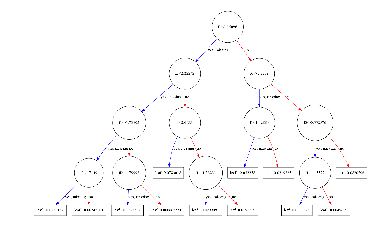

In [97]:
plot_tree(model2, num_trees=49)

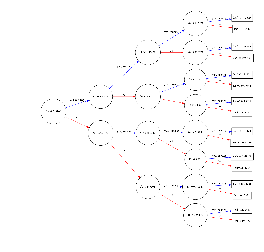

In [24]:
plot_tree(model, num_trees=0, rankdir='LR') 

In [68]:
#.grid_scores_
dir(xgboost)

NameError: name 'xgboost' is not defined

# Simulate Data (Logistic Regression)

In [17]:
## TOY DATA LOGISTIC Regression
#> set.seed(666)
np.random.seed(seed=233423)
x1 = st.norm.rvs(size=10000)           # some continuous variables 
x2 = st.norm.rvs(size=10000)  
z = 1 + 2 *x1 +3 *x2        # linear combination with a bias
pr = 1/(1 +np.exp(-z))         # pass through an inv-logit function
y = st.binom.rvs(n=1,p=pr, size=10000) #rbinom(1000,1,pr) # bernoulli response variable
 
X=np.column_stack([x1,x2])
# standardize the features since regularization requires all features to be on same scale
scaler = StandardScaler(copy=True)
# we have created a standardization based on the training data
X_train = scaler.fit(X).transform(X)
y_train = y

#now feed it to glm:
#df = data.frame(y=y,x1=x1,x2=x2)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaler.fit(X).transform(X), y, test_size=0.33, random_state=42)

# XGBOOST

In [81]:
model=XGBClassifier()

In [82]:
learning_rate=[0.0001,0.001,0.01,0.1,0.2,0.3]
n_estimators=[50,100,150,200]
max_depth=[2,4,6,8]
param_grid=dict(learning_rate=learning_rate,max_depth=max_depth,n_estimators=n_estimators)
kfold=StratifiedKFold(n_splits=10,shuffle=True,random_state=7)
grid_search=GridSearchCV(model,param_grid,scoring='neg_log_loss',n_jobs=-1,cv=kfold)
#grid_result=grid_search.fit(X,y)
grid_result=grid_search.fit(X_train,y_train)

In [94]:
#Take forever
#cross_val_score(grid_result, X_train, y_train, cv=10 ).mean()

In [90]:
model2=XGBClassifier()

In [126]:
u = model2.set_params( learning_rate= 0.1, max_depth= 4, n_estimators= 5 )
u.fit(X_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=None, n_estimators=5, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [21]:
print(u.feature_importances_)
cross_val_score(u, X_train, y_train, cv=10 ).mean()

[ 0.54491019  0.45508981]


0.85880322977947399

# Logistic Regression

- Logistic Regression Bayesian Inference approach :
    - Pymc3 with Theano

    Steps:
        1. Prepare Data
        2. Build Probabilistic Model
        3. Condition Model on Data & Find the local maximum a posteriori point given a model (MAP)
        4. Sample posterior distribution using MAP as starting points for Indepedent Variables(X's)
        5. Generate posterior predictive samples from model given a Samples of posterior distribution.

In [25]:
# 1 Use theano shared variable so that we can make predictions for new values later
log_dose_shared0 = shared(X_train[:, 0])
log_dose_shared = shared(X_train[:, 1])

# Sample size in each group. The sample size has to be a shared variable too
# Each row/observation is a group so n = total in group. 1 if only one per group
n_shared = shared(np.ones(len(X_train), dtype=int))

# Outcomes/Target
deaths = y_train


# 2 Build Probabilistic Model
with Model() as bioassay_model:

    # Priors for unknown model parameters. e.g. Logit-linear model parameters
    alpha = Normal('alpha', 0, sd=100)
    beta = Normal('beta', 0, sd=100)
    beta0 = Normal('beta0', 0, sd=100)

    # Expected value of outcome. e.g. link function outcome. Calculate probabilities of Y/Target
    theta = invlogit(alpha + beta * log_dose_shared + beta0 * log_dose_shared0 )

    # Likelihood (sampling distribution) of observations Data likelihood YTarget
    obs_deaths = Binomial('obs_deaths', n=n_shared, p=theta, observed=deaths)

    
# 3 Finds the local maximum a posteriori point given a model. uses BFGS.
from pymc3 import find_MAP
# Runs fit to data returns parameters/coefficients
map_estimate = find_MAP(model=bioassay_model)
print(map_estimate)


# 4 Now draw samples from the posterior using the given step methods.
with bioassay_model:
    
    # obtain starting values via MAP
    start = find_MAP(model=bioassay_model)
    
    # instantiate sampler
    step = pm.Metropolis()
    
    # posterior of X's
    # draw 1,000 posterior samples of independent variables
    bioassay_trace = sample(1000, step=step, start=start)


# 5 Generate posterior predictive samples from a model given a trace.
from pymc3 import sample_ppc

with bioassay_model:
    deaths_sim = sample_ppc(bioassay_trace, samples=1000)
    
# take only last half  of posterior distr. of X's. other half was burn in.
tr1 = bioassay_trace[500:]
    
#PREDICT
log_dose_to_predict0 = X_train[:1000,0] #np.random.uniform(-0.8,0.7,size=50)
log_dose_to_predict = X_train[:1000,1] #np.random.uniform(-0.8,0.7,size=50)
n_predict = n = np.ones(1000, dtype=int)

# Changing values here will also change values in the model
log_dose_shared0.set_value(log_dose_to_predict0)
log_dose_shared.set_value(log_dose_to_predict)
n_shared.set_value(n_predict)

# Simply running PPC will use the updated values and do prediction
ppc = pm.sample_ppc(tr1, model=bioassay_model, samples=500)

logp = -3,120.2, ||grad|| = 1.7939: 100%|██████████████████████████████████████████████| 14/14 [00:00<00:00, 17.61it/s]


{'beta': array(2.9168537609096776), 'beta0': array(1.9854704735996134), 'alpha': array(0.9053831851570006)}


logp = -3,120.2, ||grad|| = 1.7939: 100%|██████████████████████████████████████████████| 14/14 [00:00<00:00, 17.85it/s]
100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 2703.78it/s]


In [26]:
print( 'Accuracy:',(ppc['obs_deaths']==y[:1000]).mean() )

Accuracy: 0.804804


In [28]:
# Changing values here will also change values in the model
log_dose_shared0.set_value(np.array([ 0.93622719]))
log_dose_shared.set_value(np.array([-1.2161206]))
n_shared.set_value(np.array([1]))

# Simply running PPC will use the updated values and do prediction
ppc = pm.sample_ppc(tr1, model=bioassay_model, samples=500)

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 4242.90it/s]


In [29]:
logitInv= lambda x: np.exp(x)/(1.0+np.exp(x)) #sigmoid --> returns probability
logitInv(0.9053831851570006 + 2.9168537609096776 * 0.08986007 + 1.9854704735996134 * 2.57440271)

0.99812803417373919

# Random Forest Classifier

In [97]:
clf = RandomForestClassifier(max_depth=100,max_features='sqrt', random_state=0)
clf.fit(X_train, y_train)
print(clf.feature_importances_)

print( cross_val_score(clf, X_train, y_train, cv=10 ).mean() ) 

[ 0.40173059  0.59826941]
0.827098030498


In [98]:
print(clf.predict([[2.57440271,  0.08986007]]))
clf.predict_proba([[2.57440271,  0.08986007]])

[1]


array([[ 0.1,  0.9]])

# Logistic Regression - Sklearn

In [99]:
#logistic Regression
logit = LogisticRegression(fit_intercept=True)

# Fit model. Let X_train = matrix of predictors, y_train = matrix of variable.
# NOTE: Do not include a column for the intercept when fitting the model.
resLogit = logit.fit(X_train, y_train)
print(resLogit.coef_)
print(cross_val_score(resLogit, X_train, y_train, cv=10 ).mean())

[[ 1.9741301   2.90014277]]
0.857201540002


In [100]:
print( cross_val_score(u, X_train, y_train, cv=10 ).mean() ,
cross_val_score(clf, X_train, y_train, cv=10 ).mean(),
cross_val_score(resLogit, X_train, y_train, cv=10 ).mean() )

0.855100739401 0.827098030498 0.857201540002


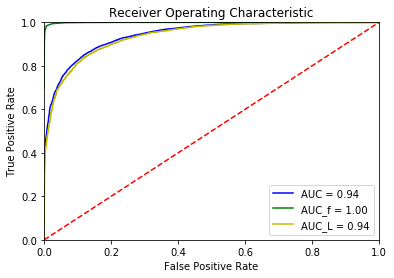

In [102]:
probs = u.predict_proba(X_train)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_train, preds)
roc_auc = metrics.auc(fpr, tpr)

pforest = clf.predict_proba(X_train)
pforest1 = pforest[:,1]
fpr1, tpr1, threshold1 = metrics.roc_curve(y_train, pforest1)
roc_auc1 = metrics.auc(fpr1, tpr1)

plog = logit.predict_proba(X_train)
plog1 = plog[:,1]
fpr2, tpr2, threshold2 = metrics.roc_curve(y_train, plog1)
roc_auc2 = metrics.auc(fpr2, tpr2)

# method I: plt
#import matplotlib.pyplot as plt
pyplot.title('Receiver Operating Characteristic')
pyplot.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
pyplot.plot(fpr1, tpr1, 'g', label = 'AUC_f = %0.2f' % roc_auc1)
pyplot.plot(fpr2, tpr2, 'y', label = 'AUC_L = %0.2f' % roc_auc2)
pyplot.legend(loc = 'lower right')
pyplot.plot([0, 1], [0, 1],'r--')
pyplot.xlim([0, 1])
pyplot.ylim([0, 1])
pyplot.ylabel('True Positive Rate')
pyplot.xlabel('False Positive Rate')
pyplot.show()

# Simulate Data (Random Forest)

In [37]:
#Toy Data Random Forest data
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=4,
                            n_informative=2, n_redundant=0,
                            random_state=0, shuffle=False)
X_train = scaler.fit(X).transform(X)
y_train = y

# Random Forest

In [19]:
clf = RandomForestClassifier(max_depth=100,max_features='sqrt', random_state=0)
clf.fit(X_train, y_train)

print(clf.feature_importances_)

print(cross_val_score(clf, X_train, y_train, cv=10 ),
np.abs(cross_val_score(clf, X_train, y_train, cv=10 ).mean()) )

[ 0.09424372  0.83597175  0.03343739  0.03634714]
[ 0.92079208  0.97029703  0.99009901  0.97029703  0.95        0.95
  0.92929293  0.92929293  0.93939394  0.8989899 ] 0.944845484548


In [45]:
print(clf.predict([[-0.57643759, -0.6723759 , -0.23639363,  0.54680607]]) , 
      clf.predict_proba([[-0.57643759, -0.6723759 , -0.23639363,  0.54680607]]))

[0] [[ 1.  0.]]


# Logistic Regression - Sklearn

In [55]:
logit = LogisticRegression(fit_intercept=True)

# Fit model. Let X_train = matrix of predictors, y_train = matrix of variable.
# NOTE: Do not include a column for the intercept when fitting the model.
resLogit = logit.fit(X_train, y_train)
print('Coeff: ',resLogit.coef_)
print('Acc: ',cross_val_score(resLogit, X_train, y_train, cv=10 )
      , np.abs(cross_val_score(resLogit, X_train, y_train, cv=10 ).mean()) )

Coeff:  [[-0.48062427  4.20389638  0.09518497 -0.25831008]]
Acc:  [ 0.93069307  0.94059406  0.95049505  0.97029703  0.95        0.96
  0.95959596  0.92929293  0.93939394  0.92929293] 0.94596549655


- ## Sklearn vs Statsmodel

In [62]:
# Initiate logistic regression object
logit = LogisticRegression(C=1e9,fit_intercept=True)

# Fit model. Let X_train = matrix of predictors, y_train = matrix of variable.
# NOTE: Do not include a column for the intercept when fitting the model.
resLogit = logit.fit(X_train, y_train)
#print(resLogit.intercept_,resLogit.coef_)

# Calculate matrix of predicted class probabilities. 
# Check resLogit.classes_ to make sure that sklearn ordered your classes as expected
predProbs = np.matrix(resLogit.predict_proba(X_train))

# Design matrix -- add column of 1's at the beginning of your X_train matrix
X_design = np.column_stack((np.ones(shape = X_train.shape[0]), X_train))
#np.ones(shape = X_train.shape[0])
#X_design =X_train

# Initiate matrix of 0's, fill diagonal with each predicted observation's variance
V = np.matrix(np.zeros(shape = (X_design.shape[0], X_design.shape[0])))
np.fill_diagonal(V, np.multiply(predProbs[:,0], predProbs[:,1]).A1)

# Covariance matrix
covLogit = np.linalg.inv(X_design.T * V * X_design)
#print("Covariance matrix: ", covLogit)

# Standard errors
print("Standard errors: ", np.sqrt(np.diag(covLogit)) )

# Wald statistic (coefficient / s.e.) ^ 2
logitParams = np.insert(resLogit.coef_, 0, resLogit.intercept_)
print("Coefficients:    ",logitParams)
#print( "Wald statistics: ", (logitParams / np.sqrt(np.diag(covLogit))) ** 2)

Standard errors:  [ 0.14894159  0.15649742  0.29668446  0.14120487  0.14041639]
Coefficients:     [ 0.32993529 -0.57036084  4.54675544  0.1001741  -0.28019433]


- ## Logistic Regression - statsmodels

In [57]:
import statsmodels.formula.api as sm
 
model = sm.Logit(y_train, X_design)
 
result =model.fit() #model.fit(method='bfgs')
result.summary()

Optimization terminated successfully.
         Current function value: 0.184428
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      995
Method:                           MLE   Df Model:                            4
Date:                Sun, 15 Oct 2017   Pseudo R-squ.:                  0.7339
Time:                        20:46:42   Log-Likelihood:                -184.43
converged:                       True   LL-Null:                       -693.12
                                        LLR p-value:                6.125e-219
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3300      0.149      2.215      0.027       0.038       0.622
x1            -0.5704      0.156     -3.645      0.000      -0.877      -0.264
x2             4.5468      0.297     15.325      0.000       3.965       5.128
x3             0.1002      0.141      0.710      0.478      -0.177       0.377
x4            -0.2802      0.140     -1.995      0.046      -0.555      -0.005
==============================================================================
"""

In [58]:
print("Standard errors: ", np.sqrt(np.diag(covLogit)) )
logitParams = np.insert(resLogit.coef_, 0, resLogit.intercept_)
print([round(float(c+(1.96*v)),3) for c,v in zip(logitParams,np.sqrt(np.diag(covLogit)))])
print([round(float(x),3) for x in logitParams])
print([round(float(c-(1.96*v)),3) for c,v in zip(logitParams,np.sqrt(np.diag(covLogit)))])

Standard errors:  [ 0.14894159  0.15649742  0.29668446  0.14120487  0.14041639]
[0.622, -0.264, 5.128, 0.377, -0.005]
[0.33, -0.57, 4.547, 0.1, -0.28]
[0.038, -0.877, 3.965, -0.177, -0.555]


In [59]:
[round(float(c+1.96*v),3) for c,v in zip(logitParams,np.sqrt(np.diag(covLogit)))]
[round(float(c-1.96*v),3) for c,v in zip(logitParams,np.sqrt(np.diag(covLogit)))]

[0.038, -0.877, 3.965, -0.177, -0.555]

In [63]:
X_train

array([[-1.27953753, -1.07614812,  0.34409454, -0.61389564],
       [-2.26261269, -0.89834916,  0.78188638,  0.43062548],
       [-0.47128857, -1.13624301, -3.07536742,  0.65616331],
       ..., 
       [ 0.66923396,  0.95782361,  0.94200115, -2.29563862],
       [ 0.05359401,  1.25619157, -0.38007636, -0.68146826],
       [ 0.76300106,  0.00566496,  0.22060183, -1.97436012]])

- Logistic Regression Bayesian Inference approach :
    - Pymc3 with Theano

In [64]:
# 1 Use theano shared variable so that we can make predictions for new values later
log_dose_shared0 = shared(X_train[:, 0])
log_dose_shared1 = shared(X_train[:, 1])
log_dose_shared2 = shared(X_train[:, 2])
log_dose_shared3 = shared(X_train[:, 3])

# Sample size in each group. The sample size has to be a shared variable too
# Each row/observation is a group so n = total in group. 1 if only one per group
n_shared = shared(np.ones(len(X_train), dtype=int))

# Outcomes/Target
deaths = y_train


# 2 Build Probabilistic Model
with Model() as bioassay_model:

    # Priors for unknown model parameters. e.g. Logit-linear model parameters
    alpha = Normal('alpha', 0, sd=100)
    beta0 = Normal('beta0', 0, sd=100)
    beta1 = Normal('beta1', 0, sd=100)
    beta2 = Normal('beta2', 0, sd=100)
    beta3 = Normal('beta3', 0, sd=100)
    
    # Expected value of outcome. e.g. link function outcome. Calculate probabilities of Y/Target
    theta = invlogit(alpha + beta0 * log_dose_shared0 + beta1 * log_dose_shared1\
                     + beta2 * log_dose_shared2 + beta3 * log_dose_shared3 )

    # Likelihood (sampling distribution) of observations Data likelihood YTarget
    obs_deaths = Binomial('obs_deaths', n=n_shared, p=theta, observed=deaths)

    
# 3 Finds the local maximum a posteriori point given a model. uses BFGS.
from pymc3 import find_MAP
# Runs fit to data returns parameters/coefficients
map_estimate = find_MAP(model=bioassay_model)
print(map_estimate)


# 4 Now draw samples from the posterior using the given step methods.
with bioassay_model:
    
    # obtain starting values via MAP
    start = find_MAP(model=bioassay_model)
    
    # instantiate sampler
    step = pm.Metropolis()
    
    # posterior of X's
    # draw 1,000 posterior samples of independent variables
    bioassay_trace = sample(1000, step=step, start=start)


# 5 Generate posterior predictive samples from a model given a trace.
from pymc3 import sample_ppc

with bioassay_model:
    deaths_sim = sample_ppc(bioassay_trace, samples=1000)
    
# take only last half  of posterior distr. of X's. other half was burn in.
tr1 = bioassay_trace[500:]
    
#PREDICT
log_dose_to_predict0 = X_train[:1000,0] #np.random.uniform(-0.8,0.7,size=50)
log_dose_to_predict1 = X_train[:1000,1] #np.random.uniform(-0.8,0.7,size=50)
log_dose_to_predict2 = X_train[:1000,2] #np.random.uniform(-0.8,0.7,size=50)
log_dose_to_predict3 = X_train[:1000,3] #np.random.uniform(-0.8,0.7,size=50)
n_predict = n = np.ones(1000, dtype=int)

# Changing values here will also change values in the model
log_dose_shared0.set_value(log_dose_to_predict0)
log_dose_shared1.set_value(log_dose_to_predict1)
log_dose_shared2.set_value(log_dose_to_predict2)
log_dose_shared3.set_value(log_dose_to_predict3)
n_shared.set_value(n_predict)

# Simply running PPC will use the updated values and do prediction
ppc = pm.sample_ppc(tr1, model=bioassay_model, samples=500)

logp = -212.05, ||grad|| = 0.02526: 100%|█████████████████████████████████████████████| 15/15 [00:00<00:00, 161.76it/s]


{'alpha': array(0.3299516403912339), 'beta2': array(0.10019578934956035), 'beta0': array(-0.5703753341549249), 'beta1': array(4.546782324385807), 'beta3': array(-0.280172519081352)}


logp = -212.05, ||grad|| = 0.02526: 100%|█████████████████████████████████████████████| 15/15 [00:00<00:00, 141.84it/s]
100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 2617.66it/s]


In [65]:
print( 'Accuracy:',(ppc['obs_deaths']==y[:1000]).mean() )

Accuracy: 0.902246


In [80]:
X_train[249:251],y_train[249:251]

(array([[-0.57643759, -0.6723759 , -0.23639363,  0.54680607],
        [-0.98566996,  1.12344181, -0.35003196, -1.1158904 ]]), array([0, 1]))

In [96]:
# Changing values here will also change values in the model
log_dose_shared0.set_value(np.array([-0.57643759]))
log_dose_shared1.set_value(np.array([-0.6723759]))
log_dose_shared2.set_value(np.array([-0.23639363]))
log_dose_shared3.set_value(np.array([0.54680607]))
n_shared.set_value(np.array([1]))

# Simply running PPC will use the updated values and do prediction
ppc = pm.sample_ppc(tr1, model=bioassay_model, samples=1000)

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 3965.11it/s]


In [97]:
ppc['obs_deaths'].mean()

0.073999999999999996

In [98]:
# Changing values here will also change values in the model
log_dose_shared0.set_value(np.array([-0.98566996]))
log_dose_shared1.set_value(np.array([1.12344181]))
log_dose_shared2.set_value(np.array([-0.35003196]))
log_dose_shared3.set_value(np.array([-1.1158904]))
n_shared.set_value(np.array([1]))

# Simply running PPC will use the updated values and do prediction
ppc = pm.sample_ppc(tr1, model=bioassay_model, samples=1000)

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 3934.30it/s]


In [111]:
ppc['obs_deaths'].mean()

1.0

In [103]:
map_estimate

{'alpha': array(0.3299516403912339),
 'beta0': array(-0.5703753341549249),
 'beta1': array(4.546782324385807),
 'beta2': array(0.10019578934956035),
 'beta3': array(-0.280172519081352)}

In [108]:
logitInv= lambda x: np.exp(x)/(1.0+np.exp(x)) #sigmoid --> returns probability
logitInv(map_estimate['alpha']+map_estimate['beta0']*X_train[249:251][1][0]+\
         map_estimate['beta1']*X_train[249:251][1][1]\
+map_estimate['beta2']*X_train[249:251][1][2]+map_estimate['beta3']*X_train[249:251][1][3])

In [ ]:
# import random, math

# def k_fold(data, myseed=11109, k=10):
#     # Load data
#     #data = open(myfile).readlines()

#     # Shuffle input
#     random.seed=myseed
#     random.shuffle(data)

#     # Compute partition size given input k
#     len_part=int(math.ceil(len(data)/float(k)))

#     # Create one partition per fold
#     train={}
#     test={}
#     for ii in range(k):
#         test[ii]  = data[ii*len_part:ii*len_part+len_part]
#         train[ii] = [jj for jj in data if jj not in test[ii]]

#     return train, test 

# import matplotlib.pyplot as plt
# %matplotlib inline

# plt.errorbar(x=log_dose_to_predict0[:50], y=np.asarray(ppc['obs_deaths']).mean(axis=0)[:50], yerr=np.asarray(ppc['obs_deaths']).std(axis=0)[:50], linestyle='', marker='o')
# plt.plot(X_train[:50, 1], deaths[:50], 'o')
# plt.xlabel('log_dose',size=15)s
# plt.ylabel('number of rats with tumors',size=15)

In [ ]:
# rf = RandomForestRegressor(n_estimators = 100, max_features='sqrt')
# rf.fit(X, y)
# # feature importances
# # the higher, the more important the feature
# d = {'importance': rf.feature_importances_}
# pd.DataFrame(d, index=X.columns).sort('importance')